In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
import os
os.system('mkdir -p images')

0

## Importing the dataset

In [3]:
name = 'aspirin_dft'
mol = 'Aspirin'
path_to_dataset = '../../datasets'

In [4]:
data = np.load("{}/{}.npz".format(path_to_dataset, name))

In [5]:
configs = data['R']
COM = configs.mean(axis = 1, keepdims = True)

In [6]:
print(configs.shape)
print(data.files)
# for i in data.files:
#     print(i)
#     print(data[i])
print(data['z'])

(211762, 21, 3)
['E', 'name', 'F', 'theory', 'R', 'z', 'type', 'md5']
[6 6 6 6 6 6 6 8 8 8 6 6 8 1 1 1 1 1 1 1 1]


In [7]:
centered_data = configs - COM

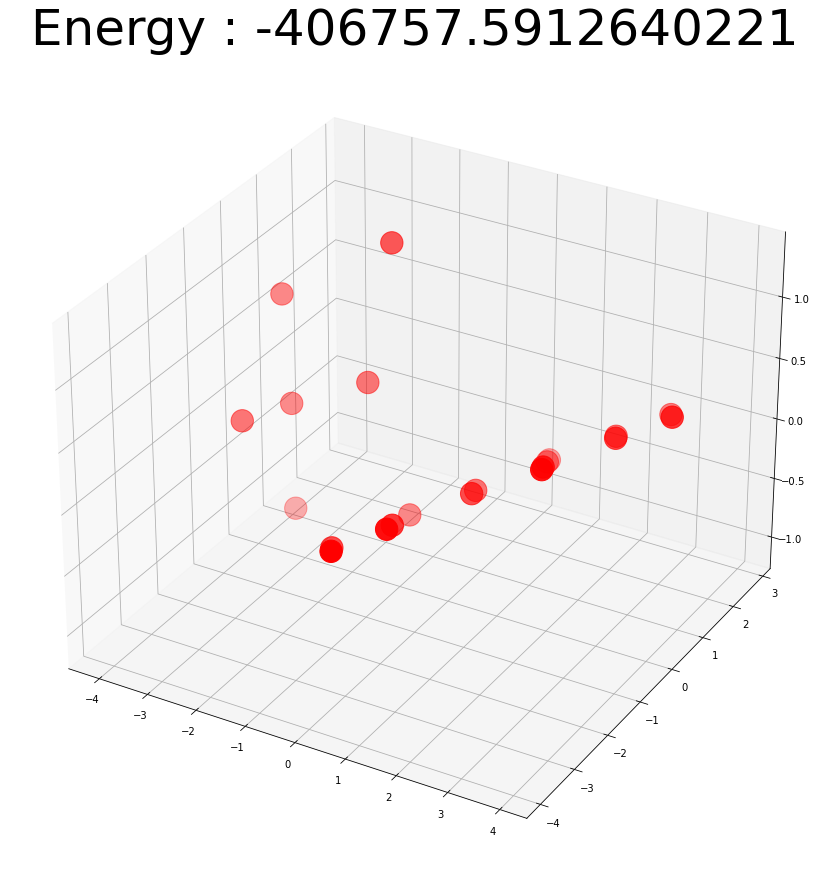

In [8]:
fig = plt.figure(figsize = (15, 15))

# plt.title("{} configurations, with Energies".format(mol), fontsize = 20)

for num in range(1):
    ax = fig.add_subplot(1, 1, num + 1, projection = '3d')
    i = centered_data[num]
    ax.scatter(i[:, 0], i[:, 1], i[:, 2], s = 500, c = 'red')
    ax.set_title("Energy : {}".format(data['E'][num][0]), fontsize = 50)
plt.savefig("images/{}_configurations_paper.png".format(mol))

In [9]:
total_size = int(5e5)
data_points = centered_data[:total_size]
data_labels = data['E'][:total_size]

## Architecturing the model

In [12]:
model = keras.Sequential([layers.Flatten(input_shape = (21, 3)), layers.Dense(20, activation = tf.nn.relu), 
                            layers.Dense(10, activation = tf.nn.relu),
                            layers.Dense(1)])
model.build()

In [13]:
assert model(data_points[:10]).shape == data_labels[:10].shape, "Check model architecture"

In [14]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(data_points, data_labels, test_size = 0.2)

In [ ]:
%%time
history = model.fit(
    train_data, train_labels,
    epochs=int(1e5),
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

### Saving preprocessed test data

In [26]:
np.save('test_data.npy', test_data)
np.save('test_labels.npy', test_labels)

## Saving the model for testing later

In [19]:
model.save('./EP')

INFO:tensorflow:Assets written to: ./EP/assets


In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1058.666626,572.883484,95
96,1002.327026,708.929749,96
97,999.751892,1175.119995,97
98,995.405823,754.155396,98
99,983.909668,1362.450439,99


In [25]:
import pickle
with open('./trainHistoryDict', 'wb') as file_pi:
        pickle.dump(hist, file_pi)